In [3]:
import scipy.signal as sig
from scipy.fft import fft
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import os

In [10]:
pwd = os.getcwd()
fdir = os.path.join(pwd,'FEB_3_outputs_try_2','5_1','sta_0003')
sta_01 = np.loadtxt(fdir)
eta = sta_01[:,1]*100

In [11]:
h = 2.2

k_pi = np.pi/h
Omega_pi = np.sqrt(9.81*k_pi*np.tanh(k_pi*h))
fOmega_pi = Omega_pi/(2*np.pi)

k_2 = 2/h
Omega_2 = np.sqrt(9.81*k_2*np.tanh(k_2*h))
fOmega_2 = Omega_2/(2*np.pi)

k_1 = 1/h
Omega_1 = np.sqrt(9.81*k_1*np.tanh(k_1*h))
fOmega_1 = Omega_1/(2*np.pi)

In [12]:
def stft(x, wlen, hop, nfft, fs):
#######################################################
#              Short-Time Fourier Transform            #
#               with MATLAB Implementation             #
#                                                      #
# Author: M.Sc. Eng. Hristo Zhivomirov        12/21/13 #
########################################################
# function: [stft, f, t] = stft(x, wlen, hop, nfft, fs)
# x - signal in the time domain
# wlen - length of the analysis Hamming window
# hop - hop size
# nfft - number of FFT points
# fs - sampling frequency, Hz
# stft - STFT matrix (only unique points, time across columns, freq across rows)
# f - frequency vector, Hz
# t - time vector, s

    # represent x as column-vector   
    x = np.transpose(x)

    # length of the signal
    xlen = len(x)

    # form a periodic hamming window
    win = sig.hamming(wlen)

    # stft matrix estimation and preallocation
    rown = int(np.ceil((1+nfft)/2))           # calculate the total number of rows
    coln = int(1+np.fix((xlen-wlen)/hop))      # calculate the total number of columns
    
    stft = np.zeros((rown, coln))         # form the stft matrix

    # initialize the signal time segment index
    indx = 0

    # perform STFT
    for col in range(coln):
        # windowing
        xw = x[indx:indx+wlen]*win

        # FFT
        X = fft(xw, nfft)

        # update the stft matrix
        stft[:, col] = X[0:rown]

        # update the index
        indx = indx + hop

    # calculate the time and frequency vectors
    nts = np.arange(wlen/2,wlen/2+(coln)*hop,hop)
    t = np.arange(wlen/2,wlen/2+(coln)*hop,hop)/fs
    f = np.arange(0,rown)*fs/nfft
   
    return stft, f, t,nts



In [13]:
fLim = [0.005,1]
fs = 8
p = eta
Nft = 256
hop = 24

sp,fsp,tsp,nts = stft(p, Nft, hop, Nft, fs)

nf = len(fsp)
fMax = 0.7

# define sigmoid (1-tanh((f-f0)*ffact))/2 for frequency correction:
f0 = 0.5 
wdth = 1/5
sgm = 0.5*(1-np.tanh((fsp-f0)/wdth))

sp = np.abs(sp)**2;                     # power     

# "rescaling" to fit sp into the colormap
kf = np.argwhere((fsp-fLim[0])*(fsp-fLim[1])<=0)[:,0]
fsp = fsp[kf] 
sp = sp[kf,:]

sma = np.max(sp[:])
s2 = np.log10(sp/sma)

print(np.shape(kf),np.shape(fsp),np.shape(sp),np.shape(s2))

(32,) (32,) (32, 282) (32, 282)


/var/folders/c_/_r0wkzf9559040y16lj66ql9j9b03k/T/ipykernel_39295/1772307236.py:45: ComplexWarning: Casting complex values to real discards the imaginary part
  stft[:, col] = X[0:rown]
/var/folders/c_/_r0wkzf9559040y16lj66ql9j9b03k/T/ipykernel_39295/3018531053.py:25: RuntimeWarning: divide by zero encountered in log10
  s2 = np.log10(sp/sma)


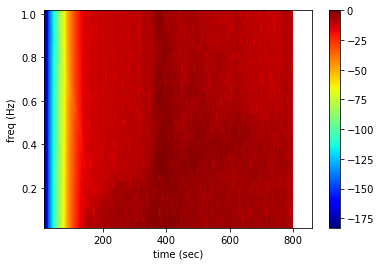

In [14]:
plt.pcolor(tsp,fsp,s2,cmap="jet")
plt.xlabel('time (sec)')
plt.ylabel('freq (Hz)')
plt.colorbar()

In [9]:
np.max(s2)

0.0